In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
folder='/home/unipi/v.vichi3/Desktop/'
df=pd.read_csv(folder+'sbdb_query_results.csv')
df.head()

spkid pha      H  epoch_mjd       e      a      i      om       w  \
0  20000433   N  10.41      60400  0.2227  1.458  10.83  304.28  178.90   
1  20000719   N  15.59      60400  0.5469  2.636  11.58  183.85  156.22   
2  20000887   N  13.88      60400  0.5710  2.472   9.40  110.42  350.48   
3  20001036   N   9.26      60400  0.5328  2.665  26.69  215.50  132.48   
4  20001221   N  17.38      60400  0.4352  1.920  11.88  171.31   26.68   

       ma    moid  
0  334.73  0.1500  
1  102.37  0.2010  
2  289.48  0.0803  
3  321.69  0.3450  
4  197.64  0.1080

In [4]:
df.shape

(34901, 11)

In [5]:
df.columns

Index(['spkid', 'pha', 'H', 'epoch_mjd', 'e', 'a', 'i', 'om', 'w', 'ma',
       'moid'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34901 entries, 0 to 34900
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   spkid      34901 non-null  int64  
 1   pha        34875 non-null  object 
 2   H          34897 non-null  float64
 3   epoch_mjd  34901 non-null  int64  
 4   e          34901 non-null  float64
 5   a          34901 non-null  float64
 6   i          34901 non-null  float64
 7   om         34901 non-null  float64
 8   w          34901 non-null  float64
 9   ma         34901 non-null  float64
 10  moid       34876 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 2.9+ MB


In [8]:
#Eliminate the null values
df.drop(df[df['moid'].isna()].index,inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(34876, 11)

In [9]:
df.describe()

spkid             H     epoch_mjd             e             a  \
count  3.487600e+04  34872.000000  34876.000000  34876.000000  34876.000000   
mean   2.359880e+07     23.486083  59701.479986      0.437249      1.764192   
std    2.362820e+07      2.894608   1572.136162      0.176989      2.117845   
min    3.001703e+06      9.260000  44221.000000      0.002800      0.461700   
25%    3.701855e+06     21.320000  59976.000000      0.304500      1.294000   
50%    3.843806e+06     23.800000  60400.000000      0.451700      1.693000   
75%    5.416717e+07     25.600000  60400.000000      0.565000      2.172000   
max    5.443990e+07     33.580000  60435.000000      0.996200    332.600000   

                  i            om             w            ma          moid  
count  34876.000000  34876.000000  34876.000000  34876.000000  3.487600e+04  
mean      12.005071    171.924096    182.571561    171.755088  8.552434e-02  
std       10.694688    103.659852    104.303965    122.272791  9.834009e-02  
min        0.010000      0.010000      0.000000      0.000000  4.540000e-07  
25%        4.420000     80.380000     93.357500     49.480000  1.280000e-02  
50%        8.490000    171.660000    184.530000    164.700000  4.520000e-02  
75%       16.810000    252.402500    272.662500    291.902500  1.280000e-01  
max      165.580000    359.980000    359.960000    360.000000  7.080000e-01

In [10]:
df[df['a']>5]

spkid pha      H  epoch_mjd       e        a       i      om  \
3510    3024715   Y  17.69      60400  0.9480   17.800   19.67   48.69   
6483    3434371   N  24.11      54767  0.9060    7.315   32.39  213.81   
11522   3683246   N  20.00      60400  0.9407   21.440   93.63  338.57   
15455   3766081   N  16.27      57742  0.9919  153.200  145.50  165.97   
17114   3799259   N  21.20      60400  0.9962  332.600  108.34  219.67   
19835   3840692   N  22.61      60400  0.9889   96.930  139.83  340.62   
20634   3843547   N  18.68      60400  0.7984    5.774   10.98  348.98   
20682   3843840   N  18.17      58729  0.9789   59.680  159.03  187.95   
20698   3843628   N  21.20      60400  0.7734    5.693   13.57  252.31   
20742   3843716   N  20.05      60400  0.7984    5.775   10.96  348.94   
22110   3989287   N  18.12      60400  0.9213    7.701  165.58  105.87   
28090  54240416   N  18.61      60400  0.8883    9.983    4.72   77.69   

            w      ma    moid  
3510   333.32  117.04  0.0111  
6483   263.82  357.31  0.1090  
11522  311.75   35.25  0.4590  
15455   77.94  360.00  0.5970  
17114  151.26    0.39  0.3330  
19835  193.09    1.90  0.1010  
20634   57.12  114.87  0.2340  
20682  176.27    0.09  0.2580  
20698   75.55  122.88  0.3770  
20742   57.16  114.83  0.2330  
22110   57.80   66.15  0.0817  
28090  298.05   26.08  0.1390

In [11]:
#We eliminate the values with a>5
df.drop(df[df['a']>5].index,inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(34864, 11)

In [12]:
df.describe()

spkid             H     epoch_mjd             e             a  \
count  3.486400e+04  34860.000000  34864.000000  34864.000000  34864.000000   
mean   2.360419e+07     23.487377  59701.525298      0.437086      1.744036   
std    2.362906e+07      2.893991   1572.100889      0.176795      0.556275   
min    3.001703e+06      9.260000  44221.000000      0.002800      0.461700   
25%    3.701855e+06     21.330000  59976.000000      0.304400      1.294000   
50%    3.843818e+06     23.800000  60400.000000      0.451600      1.692000   
75%    5.416727e+07     25.600000  60400.000000      0.564900      2.171000   
max    5.443990e+07     33.580000  60435.000000      0.970300      4.816000   

                  i            om             w            ma          moid  
count  34864.000000  34864.000000  34864.000000  34864.000000  3.486400e+04  
mean      11.983268    171.907288    182.575511    171.776436  8.546965e-02  
std       10.567228    103.655813    104.304053    122.267979  9.826509e-02  
min        0.010000      0.010000      0.000000      0.000000  4.540000e-07  
25%        4.420000     80.377500     93.367500     49.525000  1.280000e-02  
50%        8.490000    171.650000    184.545000    164.730000  4.520000e-02  
75%       16.802500    252.400000    272.662500    291.915000  1.280000e-01  
max      154.350000    359.980000    359.960000    360.000000  7.080000e-01

In [15]:
#Count the number of PHAs in the dataset
print("Number of PHAs:", np.count_nonzero(df['pha']=='Y'))
print("Percentage of PHAs:", 100*np.count_nonzero(df['pha']=='Y')/df.shape[0])

Number of PHAs: 2421
Percentage of PHAs: 6.944125745754933


In [16]:
#Number of asteroids with MOID=0 and MOID <0.05
print("Number of asteroids with MOID=0:", len(df[df['moid']==0.0]))
print("Number of asteroids with MOID < 0.05:", len(df[df['moid']<0.05]))

Number of asteroids with MOID=0: 0
Number of asteroids with MOID < 0.05: 18275


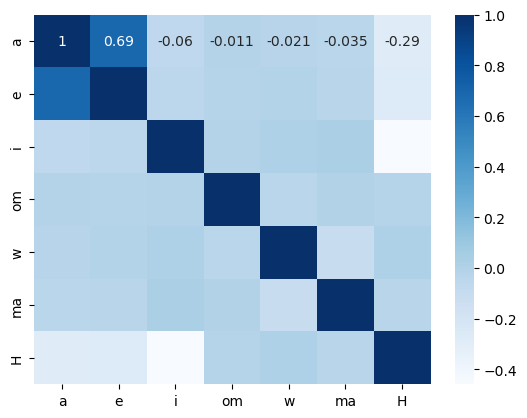

In [18]:
#Correlation
corr=df[['a','e','i','om','w','ma','H']].corr() #computes the Pearson's correlation coefficients
sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

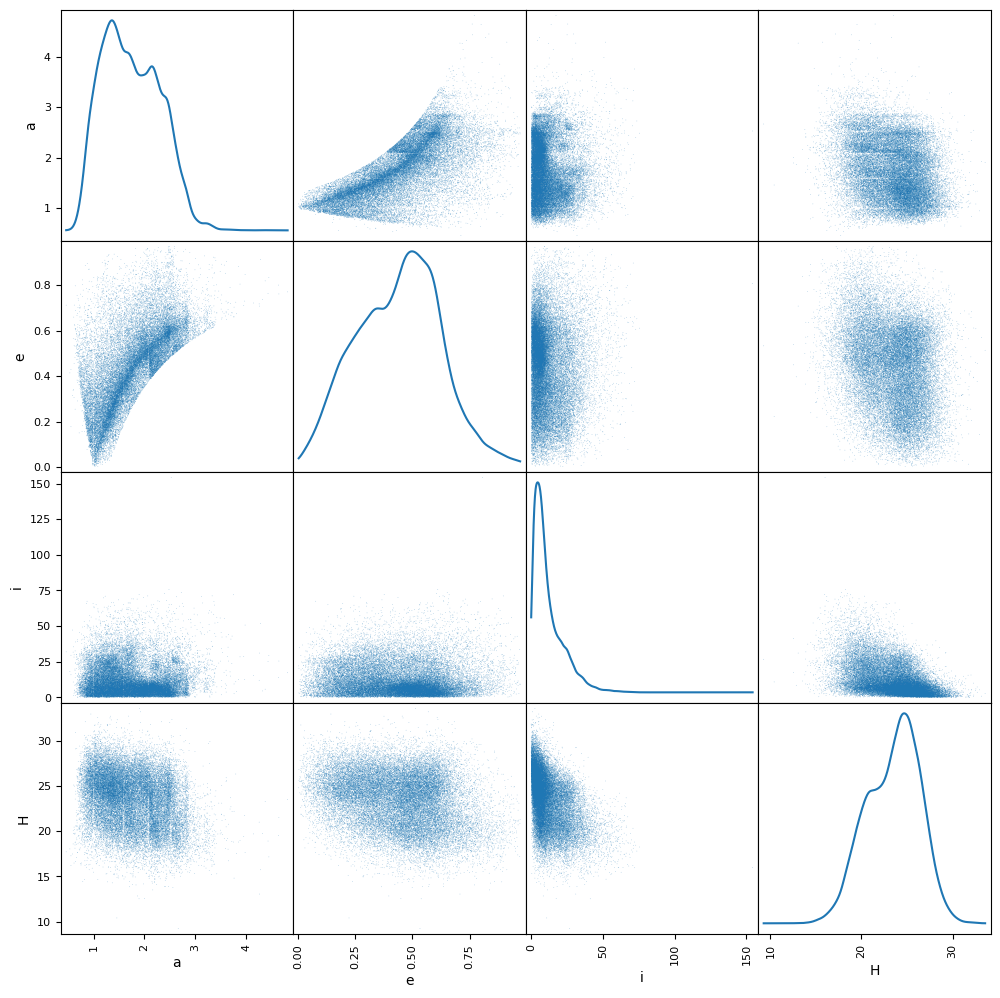

In [19]:
#Scatter matrix of a,e,i,H
from pandas.plotting import scatter_matrix
scatter_matrix(df[['a','e','i','H']],diagonal='kde',s=1,figsize=(12,12))
plt.show()

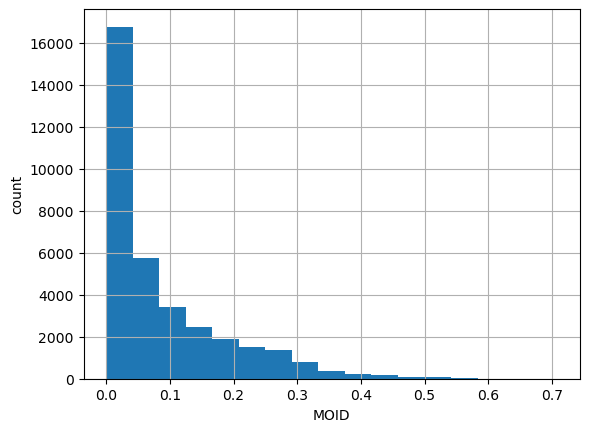

In [21]:
#Histogram of the MOID
num_bins=math.ceil(math.log2(len(df))+1) #Sturges rule
df['moid'].hist(bins=num_bins)
plt.xlabel('MOID')
plt.ylabel('count')
plt.show()

In [22]:
df.to_csv(folder+'neos_dataframe.csv')